# Scaling
When the values are spread over the wide range it is necessary for them to be in the same scale so that the comparative plots could be easy and it also helps us detect the outliers.

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

In [2]:
#Loading the data
df=pd.read_csv('bank_encoded.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10.0,1,0.0,0,1787,0,0,0.0,19,10,79,1,-1,0,NaN,0
1,33,7.0,1,1.0,0,4789,1,1,0.0,11,8,220,1,339,4,0.0,0
2,35,4.0,2,2.0,0,1350,1,0,0.0,16,0,185,1,330,1,0.0,0
3,30,4.0,1,2.0,0,1476,1,1,NaN,3,6,199,4,-1,0,NaN,0
4,59,1.0,1,1.0,0,0,1,0,NaN,5,8,226,1,-1,0,NaN,0


In [3]:
#minimum value from the column
df['balance'].min()

-3313

In [4]:
df['balance'].max()

71188

In [5]:
df['balance']=df['balance'].apply(lambda v:(v-df['balance'].min())/(df['balance'].max()-df['balance'].min()))
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10.0,1,0.0,0,0.068455,0,0,0.0,19,10,79,1,-1,0,NaN,0
1,33,7.0,1,1.0,0,0.108750,1,1,0.0,11,8,220,1,339,4,0.0,0
2,35,4.0,2,2.0,0,0.062590,1,0,0.0,16,0,185,1,330,1,0.0,0
3,30,4.0,1,2.0,0,0.064281,1,1,NaN,3,6,199,4,-1,0,NaN,0
4,59,1.0,1,1.0,0,0.044469,1,0,NaN,5,8,226,1,-1,0,NaN,0


In [6]:
df['balance'].min()

0.0

In [7]:
df['balance'].max()

1.0

In [8]:
#We can do the same for pdays which has negative values
df['pdays']=df['pdays'].apply(lambda v:(v-df['pdays'].min())/(df['pdays'].max()-df['pdays'].min()))
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10.0,1,0.0,0,0.068455,0,0,0.0,19,10,79,1,0.000000,0,NaN,0
1,33,7.0,1,1.0,0,0.108750,1,1,0.0,11,8,220,1,0.389908,4,0.0,0
2,35,4.0,2,2.0,0,0.062590,1,0,0.0,16,0,185,1,0.379587,1,0.0,0
3,30,4.0,1,2.0,0,0.064281,1,1,NaN,3,6,199,4,0.000000,0,NaN,0
4,59,1.0,1,1.0,0,0.044469,1,0,NaN,5,8,226,1,0.000000,0,NaN,0


In [9]:
#Scaling the duration since it is widely spread
df['duration']=df['duration'].apply(lambda v:(v-df['duration'].min())/(df['duration'].max()-df['duration'].min()))
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10.0,1,0.0,0,0.068455,0,0,0.0,19,10,0.024826,1,0.000000,0,NaN,0
1,33,7.0,1,1.0,0,0.108750,1,1,0.0,11,8,0.071500,1,0.389908,4,0.0,0
2,35,4.0,2,2.0,0,0.062590,1,0,0.0,16,0,0.059914,1,0.379587,1,0.0,0
3,30,4.0,1,2.0,0,0.064281,1,1,NaN,3,6,0.064548,4,0.000000,0,NaN,0
4,59,1.0,1,1.0,0,0.044469,1,0,NaN,5,8,0.073486,1,0.000000,0,NaN,0


#### MinMaxScaler
You can also do the scaling using `MinMaxScaler()` a function offered by `sklearn.preprocessing` which makes things lot easier. The datapoints vary in the range of [0,1].

In [10]:
#We will load the data again
df=pd.read_csv('bank_encoded.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10.0,1,0.0,0,1787,0,0,0.0,19,10,79,1,-1,0,NaN,0
1,33,7.0,1,1.0,0,4789,1,1,0.0,11,8,220,1,339,4,0.0,0
2,35,4.0,2,2.0,0,1350,1,0,0.0,16,0,185,1,330,1,0.0,0
3,30,4.0,1,2.0,0,1476,1,1,NaN,3,6,199,4,-1,0,NaN,0
4,59,1.0,1,1.0,0,0,1,0,NaN,5,8,226,1,-1,0,NaN,0


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df['balance']=scaler.fit_transform(df[['balance']])
df['duration']=scaler.fit_transform(df[['duration']])
df['pdays']=scaler.fit_transform(df[['pdays']])
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10.0,1,0.0,0,0.068455,0,0,0.0,19,10,0.024826,1,0.000000,0,NaN,0
1,33,7.0,1,1.0,0,0.108750,1,1,0.0,11,8,0.071500,1,0.389908,4,0.0,0
2,35,4.0,2,2.0,0,0.062590,1,0,0.0,16,0,0.059914,1,0.379587,1,0.0,0
3,30,4.0,1,2.0,0,0.064281,1,1,NaN,3,6,0.064548,4,0.000000,0,NaN,0
4,59,1.0,1,1.0,0,0.044469,1,0,NaN,5,8,0.073486,1,0.000000,0,NaN,0


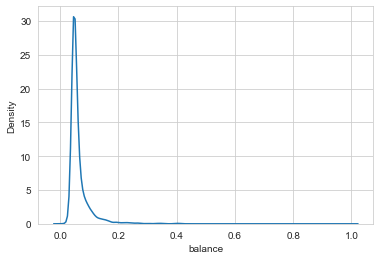

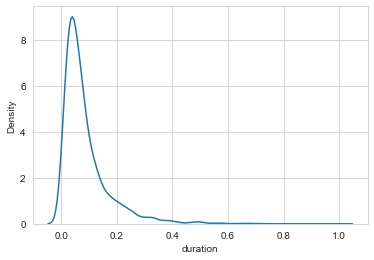

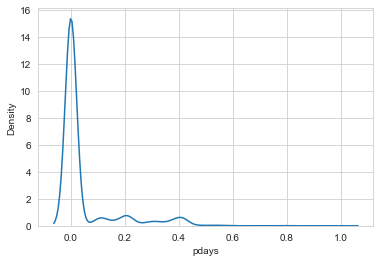

In [12]:
#Let's see the the distribution of data points now
scaled_cols=['balance','duration','pdays']
for col in scaled_cols:
    sns.kdeplot(df[col])
    plt.show()

In [13]:
#Since all the values are numeric we can find the stastical information now
df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4483.000000,4521.000000,4334.000000,4521.000000,4521.000000,4521.000000,4521.000000,3197.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,816.000000,4521.000000
mean,41.170095,4.355342,1.147755,1.155053,0.016810,0.063565,0.566025,0.152842,0.094151,15.915284,5.540146,0.086051,2.793630,0.046751,0.542579,0.557598,0.115240
std,10.576211,3.212222,0.599650,0.666325,0.128575,0.040397,0.495676,0.359875,0.292084,8.247667,3.002763,0.086017,3.109807,0.114818,1.693562,0.750699,0.319347
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,0.045395,0.000000,0.000000,0.000000,9.000000,3.000000,0.033102,1.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,0.050429,1.000000,0.000000,0.000000,16.000000,6.000000,0.059914,2.000000,0.000000,0.000000,0.000000,0.000000
75%,49.000000,7.000000,2.000000,2.000000,0.000000,0.064335,1.000000,0.000000,0.000000,21.000000,8.000000,0.107580,3.000000,0.000000,0.000000,1.000000,0.000000
max,87.000000,10.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,11.000000,1.000000,50.000000,1.000000,25.000000,2.000000,1.000000


In [14]:
#We can also find the correlation between all the attributes
#It's by default pearson's correlation
df.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,-0.033529,-0.381485,-0.190484,-0.017885,0.083820,-0.193888,-0.011250,0.204200,-0.017853,-0.040714,-0.002367,-0.005148,-0.008894,-0.003511,0.048548,0.045092
job,-0.033529,1.000000,0.070485,0.193792,0.010756,0.009529,-0.112240,-0.034870,-0.027828,0.013326,-0.094268,-0.003707,-0.001437,-0.022693,0.005572,0.040507,0.024273
marital,-0.381485,0.070485,1.000000,0.126414,-0.020745,0.024971,-0.029851,-0.045210,-0.043501,0.008794,-0.035855,0.006619,0.005915,0.017050,0.038028,0.019372,0.015042
education,-0.190484,0.193792,0.126414,1.000000,-0.011623,0.056585,-0.072716,-0.024752,-0.117748,0.017107,-0.079219,-0.011193,0.009714,0.011531,0.030396,0.023715,0.055368
default,-0.017885,0.010756,-0.020745,-0.011623,1.000000,-0.070886,0.006881,0.063994,-0.023372,-0.013261,0.014297,-0.011615,-0.012348,-0.026317,-0.026656,0.025369,0.001303
balance,0.083820,0.009529,0.024971,0.056585,-0.070886,1.000000,-0.050227,-0.071349,0.036326,-0.008677,0.023113,-0.015950,-0.009976,0.009437,0.026196,0.020393,0.017905
housing,-0.193888,-0.112240,-0.029851,-0.072716,0.006881,-0.050227,1.000000,0.018451,-0.046484,-0.031291,0.266630,0.015740,-0.003574,0.116893,0.038621,-0.253137,-0.104683
loan,-0.011250,-0.034870,-0.045210,-0.024752,0.063994,-0.071349,0.018451,1.000000,-0.007166,-0.004879,0.016329,-0.004997,0.017120,-0.031086,-0.022115,-0.096067,-0.070517
contact,0.204200,-0.027828,-0.043501,-0.117748,-0.023372,0.036326,-0.046484,-0.007166,1.000000,0.055509,0.071207,-0.027292,0.033973,-0.024204,-0.001642,0.037807,0.002108
day,-0.017853,0.013326,0.008794,0.017107,-0.013261,-0.008677,-0.031291,-0.004879,0.055509,1.000000,-0.014795,-0.024629,0.160706,-0.094352,-0.059114,0.019975,-0.011244


#### StandardScaler
It is another function from `sklearn.preprocessing`. It used for scaling the data which is normally distrbuted. It makes the `mean=0` and distributes the data around it.

In [15]:
from sklearn.preprocessing import  StandardScaler
scaler = StandardScaler()

In [16]:
#We load the data again for showing the normal distribution
df=pd.read_csv('bank_encoded.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10.0,1,0.0,0,1787,0,0,0.0,19,10,79,1,-1,0,NaN,0
1,33,7.0,1,1.0,0,4789,1,1,0.0,11,8,220,1,339,4,0.0,0
2,35,4.0,2,2.0,0,1350,1,0,0.0,16,0,185,1,330,1,0.0,0
3,30,4.0,1,2.0,0,1476,1,1,NaN,3,6,199,4,-1,0,NaN,0
4,59,1.0,1,1.0,0,0,1,0,NaN,5,8,226,1,-1,0,NaN,0


In [17]:
df['balance']=scaler.fit_transform(df[['balance']])
df['duration']=scaler.fit_transform(df[['duration']])
df['pdays']=scaler.fit_transform(df[['pdays']])
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,10.0,1,0.0,0,0.121072,0,0,0.0,19,10,-0.711861,1,-0.407218,0,NaN,0
1,33,7.0,1,1.0,0,1.118644,1,1,0.0,11,8,-0.169194,1,2.989044,4,0.0,0
2,35,4.0,2,2.0,0,-0.024144,1,0,0.0,16,0,-0.303898,1,2.899143,1,0.0,0
3,30,4.0,1,2.0,0,0.017726,1,1,NaN,3,6,-0.250017,4,-0.407218,0,NaN,0
4,59,1.0,1,1.0,0,-0.472753,1,0,NaN,5,8,-0.146102,1,-0.407218,0,NaN,0


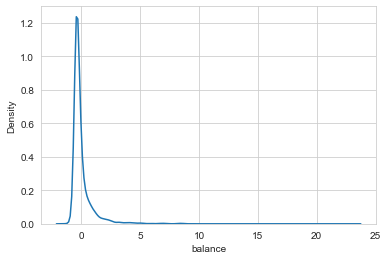

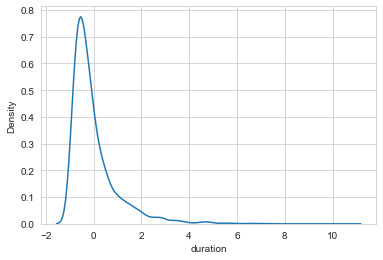

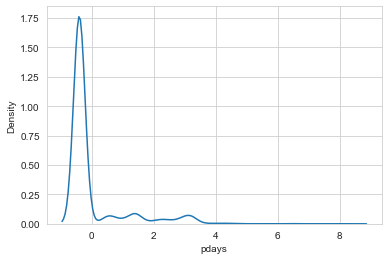

In [18]:
#Let's see the the distribution of data points now
scaled_cols=['balance','duration','pdays']
for col in scaled_cols:
    sns.kdeplot(df[col])
    plt.show()

In [19]:
df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,4521.000000,4483.000000,4521.000000,4334.000000,4521.000000,4.521000e+03,4521.000000,4521.000000,3197.000000,4521.000000,4521.000000,4.521000e+03,4521.000000,4.521000e+03,4521.000000,816.000000,4521.000000
mean,41.170095,4.355342,1.147755,1.155053,0.016810,4.428552e-17,0.566025,0.152842,0.094151,15.915284,5.540146,-4.670746e-17,2.793630,2.864331e-16,0.542579,0.557598,0.115240
std,10.576211,3.212222,0.599650,0.666325,0.128575,1.000111e+00,0.495676,0.359875,0.292084,8.247667,3.002763,1.000111e+00,3.109807,1.000111e+00,1.693562,0.750699,0.319347
min,19.000000,0.000000,0.000000,0.000000,0.000000,-1.573671e+00,0.000000,0.000000,0.000000,1.000000,0.000000,-1.000513e+00,1.000000,-4.072183e-01,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,-4.498240e-01,0.000000,0.000000,0.000000,9.000000,3.000000,-6.156433e-01,1.000000,-4.072183e-01,0.000000,0.000000,0.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,-3.252105e-01,1.000000,0.000000,0.000000,16.000000,6.000000,-3.038984e-01,2.000000,-4.072183e-01,0.000000,0.000000,0.000000
75%,49.000000,7.000000,2.000000,2.000000,0.000000,1.905496e-02,1.000000,0.000000,0.000000,21.000000,8.000000,2.503146e-01,3.000000,-4.072183e-01,0.000000,1.000000,0.000000
max,87.000000,10.000000,2.000000,2.000000,1.000000,2.318321e+01,1.000000,1.000000,1.000000,31.000000,11.000000,1.062641e+01,50.000000,8.303196e+00,25.000000,2.000000,1.000000


In [20]:
df.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
age,1.000000,-0.033529,-0.381485,-0.190484,-0.017885,0.083820,-0.193888,-0.011250,0.204200,-0.017853,-0.040714,-0.002367,-0.005148,-0.008894,-0.003511,0.048548,0.045092
job,-0.033529,1.000000,0.070485,0.193792,0.010756,0.009529,-0.112240,-0.034870,-0.027828,0.013326,-0.094268,-0.003707,-0.001437,-0.022693,0.005572,0.040507,0.024273
marital,-0.381485,0.070485,1.000000,0.126414,-0.020745,0.024971,-0.029851,-0.045210,-0.043501,0.008794,-0.035855,0.006619,0.005915,0.017050,0.038028,0.019372,0.015042
education,-0.190484,0.193792,0.126414,1.000000,-0.011623,0.056585,-0.072716,-0.024752,-0.117748,0.017107,-0.079219,-0.011193,0.009714,0.011531,0.030396,0.023715,0.055368
default,-0.017885,0.010756,-0.020745,-0.011623,1.000000,-0.070886,0.006881,0.063994,-0.023372,-0.013261,0.014297,-0.011615,-0.012348,-0.026317,-0.026656,0.025369,0.001303
balance,0.083820,0.009529,0.024971,0.056585,-0.070886,1.000000,-0.050227,-0.071349,0.036326,-0.008677,0.023113,-0.015950,-0.009976,0.009437,0.026196,0.020393,0.017905
housing,-0.193888,-0.112240,-0.029851,-0.072716,0.006881,-0.050227,1.000000,0.018451,-0.046484,-0.031291,0.266630,0.015740,-0.003574,0.116893,0.038621,-0.253137,-0.104683
loan,-0.011250,-0.034870,-0.045210,-0.024752,0.063994,-0.071349,0.018451,1.000000,-0.007166,-0.004879,0.016329,-0.004997,0.017120,-0.031086,-0.022115,-0.096067,-0.070517
contact,0.204200,-0.027828,-0.043501,-0.117748,-0.023372,0.036326,-0.046484,-0.007166,1.000000,0.055509,0.071207,-0.027292,0.033973,-0.024204,-0.001642,0.037807,0.002108
day,-0.017853,0.013326,0.008794,0.017107,-0.013261,-0.008677,-0.031291,-0.004879,0.055509,1.000000,-0.014795,-0.024629,0.160706,-0.094352,-0.059114,0.019975,-0.011244


The End